<a href="https://colab.research.google.com/github/aamir-ansari-44/Study/blob/main/_optimization_3_gradient_descent_in_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def get_partials(func, x, y):
    delta = 0.001
    fx= (func(x+delta,y)-func(x,y))/delta
    fy= (func(x,y+delta)-func(x,y))/delta
    return fx, fy

In [ ]:
func = lambda x,y: x**2 + y**2

In [ ]:
get_partials(func, 3, 4)

(6.000999999997703, 8.0010000000037)

In [ ]:
#creating a 2D grid
def get_grid(axis_lim, sz=21):
    x= np.linspace(-axis_lim,axis_lim,sz)
    y= np.linspace(-axis_lim,axis_lim,sz)
    g1,g2 = np.meshgrid(x,y)
    return g1,g2

In [ ]:
g1, g2 = get_grid(axis_lim=3, sz=7)

In [ ]:
print(g1.shape)
print(g2.shape)

(7, 7)
(7, 7)


In [ ]:
g1 #x

array([[-3., -2., -1.,  0.,  1.,  2.,  3.],
       [-3., -2., -1.,  0.,  1.,  2.,  3.],
       [-3., -2., -1.,  0.,  1.,  2.,  3.],
       [-3., -2., -1.,  0.,  1.,  2.,  3.],
       [-3., -2., -1.,  0.,  1.,  2.,  3.],
       [-3., -2., -1.,  0.,  1.,  2.,  3.],
       [-3., -2., -1.,  0.,  1.,  2.,  3.]])

In [ ]:
g2 #y

array([[-3., -3., -3., -3., -3., -3., -3.],
       [-2., -2., -2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.]])

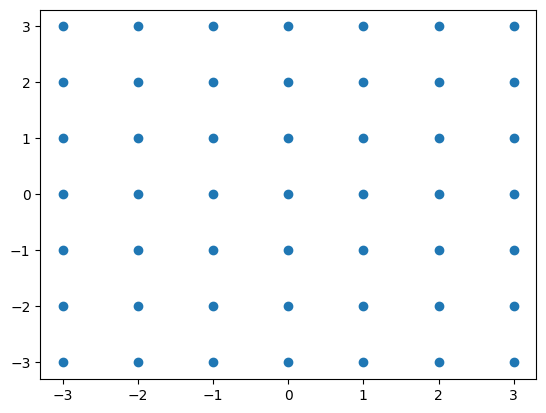

In [ ]:
plt.scatter(g1, g2)

What are g1 and g2? (Understanding `np.meshgrid()`)

In our implementation of `get_grid()`, we defined x and y using `linspace`, as we want to evaluate the corresponding values of the function.

Suppose x and y look like:

```
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

Then we want a grid like:
[[(1, 10), (2, 10), (3, 10), (4, 10)],
 [(1, 20), (2, 20), (3, 20), (4, 20)],
 [(1, 30), (2, 30), (3, 30), (4, 30)],
 [(1, 40), (2, 40), (3, 40), (4, 40)]]

```

This is exactly what we get using `np.meshgrid()`, that gives the x-coordinates and y-coordinates of these points as different lists: `g1 and g2`

It is exactly like `np.linspace()` , but for 2-dimensions

In [ ]:
#getting gradients for all the points in the 2d grid defined above
# def get_partials_from_grid(func,g1,g2):
#     U = np.zeros(g1.shape) # df/dx
#     V = np.zeros(g2.shape) # df/dy
#     for rows_id,(row_x,row_y) in enumerate(zip(g1,g2)):
#         for col_id,(x,y) in enumerate(zip(row_x,row_y)):
#             fx,fy = get_partials(func, x, y)
#             U[rows_id,col_id] = fx
#             V[rows_id,col_id] = fy
#     return U,V

In [ ]:
#getting gradients for all the points in the 2d grid defined above
def get_partials_from_grid(func,g1,g2):
    U = np.zeros(g1.shape) # df/dx
    V = np.zeros(g2.shape) # df/dy
    for row_id in range(g1.shape[0]):
        for col_id in range(g1.shape[1]):
            x = g1[row_id, col_id]
            y = g2[row_id, col_id]
            fx,fy = get_partials(func, x, y)
            U[row_id,col_id] = fx
            V[row_id,col_id] = fy
    return U,V

In [ ]:
def plot_gradients(g1,g2,U,V):
    fig,ax=plt.subplots()
    q=ax.quiver(g1,g2,U,V)
    plt.show()

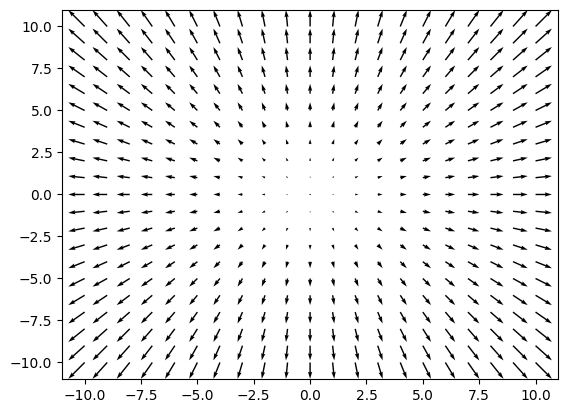

In [ ]:
func = lambda x,y : x**2 + y**2
axis_lim = 10
g1,g2 = get_grid(axis_lim)
U,V = get_partials_from_grid(func,g1,g2)
plot_gradients(g1,g2,U,V)

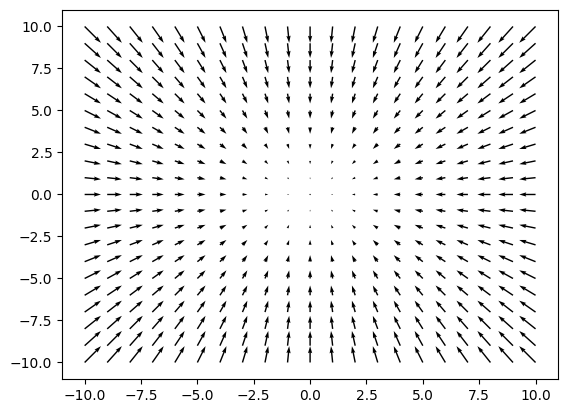

In [ ]:
func = lambda x,y : x**2 + y**2
axis_lim = 10
g1,g2 = get_grid(axis_lim)
U,V = get_partials_from_grid(func,g1,g2)
plot_gradients(g1,g2,-U,-V)